# Training

In [1]:
from pathlib import Path
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from torch.utils.data import Dataset, DataLoader
import torch
import json

# Add the root project directory to the Python path
ROOT = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(ROOT))
from configs.path_config import GROUP1A, EXTRACTED_DATA_DIR, WEIGHTS_DIR
from src.processing import dataset
from models import lstm_model

C:\Users\hpl886\Documents\Exjobb


In [2]:
group = GROUP1A
data = dataset.StrainDataset(EXTRACTED_DATA_DIR, GROUP1A, sequence_length=128)

# Access the data loaders directly from the class instance
train_loader = data.train_dataloader

c:\Users\hpl886\Documents\Exjobb\src\processing\dataset.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:281.)
  self.sequences = torch.tensor(self.sequences, dtype=torch.float32)


In [3]:
# Model parameters
input_dim = len(group)
hidden_dim = 32
num_layers = 1

num_epochs = 2
learning_rate = 0.001

model = lstm_model.LSTMModel(input_dim, hidden_dim, num_layers)
losses = lstm_model.training_loop(model, train_loader, num_epochs, learning_rate)

Epoch 1/2: 100%|██████████| 350/350 [00:02<00:00, 145.51batch/s]



Epoch 1/2, Average Loss: 0.0223



Epoch 2/2: 100%|██████████| 350/350 [00:02<00:00, 145.42batch/s]


Epoch 2/2, Average Loss: 0.0036



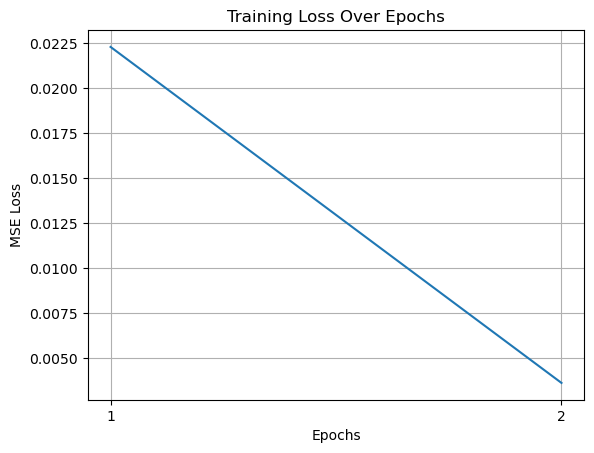

In [4]:
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epochs')
plt.xticks(range(1, num_epochs + 1))
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()